# Saddle Frontend Data Graph


Visualize data sources and state in different UI flows

**Note: You'll need to have graphviz installed on your system, use `brew install graphviz` on osx**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Set up graph, vars and config

In [5]:
common_node_attrs = {'style': 'filled', 'shape': 'box', 'colorscheme': 'pastel17'}
# Use the accessible ColorBrewer palette https://graphviz.org/doc/info/colors.html#brewer
common_edge_attrs = {'colorscheme': 'pastel17'}
colors = {
    'contract': 1,
    'state': 2,
    'network': 3,
    'ui': 4,
    'ui_section': 4,
    'ui_page': 4,
    'actions': 5,
    'key': 'invis'
}

# initialize a directed graph 
G = nx.DiGraph(
    splines='ortho', 
    rankdir='LR', 
    node=common_node_attrs, 
    edge=common_edge_attrs
)

def format_label(node_id):
    """
    Converts a node_id into a human readable label
    eg actions_create_pool -> Create Pool
    """
    parts = node_id.split('_')[1:] # ignore type in 0th position
    result = []
    for part in parts:
        if part == 'sdl':
            result.append('SDL')
        elif part == 'un':
            result.append('Un /')
        elif part == 'section' or part == 'page':
            continue
        else:
            result.append(part.capitalize())
    result = ' '.join(result).strip()
    if node_id[-1] == "_":
        result += "*"
    return result

def create_nodes(ids):
    """
    Parse a set of node ids into graph node objects which include type and label attributes
    Additionally, add the id to global variables so they can be tab completed. Avoids typos.
    """
    output = []
    for id in ids:
        globals()[id] = id # add node name to global vars for autocomplete later

        node_attrs = {}
        parts = id.split("_")
        node_attrs['type'] = '_'.join(parts[:2]) if parts[0] == 'ui' else parts[0]
        node_attrs['label'] = format_label(id)
#         node_attrs['label'] = ' '.join([x.capitalize() + ' /' if x == 'un' else x.capitalize() for x in parts[1:]]).strip()
        
        output.append((id, node_attrs))
    return output


# Create Nodes

In [6]:
# Contracts
G.add_nodes_from(create_nodes([
    'contract_master_registry',
    'contract_pool_registry',
    'contract_gauge_controller',
    'contract_liquidity_gauge_',
    'contract_root_gauge_',
    'contract_voting_escrow',
    'contract_sdl',
    'contract_migrator',
    'contract_minichef',
    'contract_swap_',
    'contract_bridge',
    'contract_permissionless_deployer',
    'contract_erc20_',
    'contract_ext_contracts',
    'contract_fee_distributor',
    'key_contract',
]), fillcolor=colors['contract'])  

# State
G.add_nodes_from(create_nodes([
    'state_pools',
    'state_tokens',
    'state_prices',
    'state_partner_rewards',
    'state_minichef',
    'state_aprs',
    'state_apys',
    'state_user',
    'state_gauges',
    'key_state',
]), fillcolor=colors['state'])

# Network
G.add_nodes_from(create_nodes([
    'network_pool_stats_api',
    'network_coingecko',
    'network_ext_apis',
    'network_subgraph',
    'network_snapshot',
    'key_network',
]), fillcolor=colors['network'])

# UI
G.add_nodes_from(create_nodes([
    'ui_section_swap',
    'ui_section_withdraw',
    'ui_section_deposit',
    'ui_section_pool_overview',
    'ui_section_reserves',
    'ui_section_my_farm',
    'ui_section_my_share',
    'ui_section_info',
    'ui_section_create_pool_form',
    'ui_section_wrap_sdl',
    'ui_section_vote_for_gauge',
    'ui_section_gauge_allocations',
    'ui_section_vesdl_fee',
    'ui_section_pool_farm',
    'ui_page_swap',
    'ui_page_pool',
    'ui_page_pool_factory',
    'ui_page_pools',
    'ui_page_gauges',
    'ui_page_gauge_farm',
    'key_ui'
]), fillcolor=colors['ui'])

# Actions
G.add_nodes_from(create_nodes([
    'actions_swap',
    'actions_virtual_swap',
    'actions_deposit',
    'actions_withdraw',
    'actions_un_stake_in_minichef',
    'actions_migrate',
    'actions_create_pool',
    'actions_un_stake_in_gauge',
    'actions_un_wrap_sdl',
    'actions_vote_for_gauge',
    'actions_claim_fee',
    'key_actions',
]), fillcolor=colors['actions'])

legend_nodes = [key_contract, key_network, key_state, key_actions, key_ui]

# Create Edges

In [7]:
# Contract
G.add_edges_from([
    (contract_bridge, actions_virtual_swap),
    (contract_erc20_, actions_create_pool),
    (contract_erc20_, actions_un_stake_in_gauge),
    (contract_erc20_, network_subgraph),
    (contract_erc20_, state_tokens),
    (contract_erc20_, state_user),
    (contract_ext_contracts, state_partner_rewards),
    (contract_ext_contracts, ui_section_my_share),
    (contract_fee_distributor, actions_claim_fee),
    (contract_fee_distributor, state_user),
    (contract_fee_distributor, ui_section_vesdl_fee),
    (contract_gauge_controller, contract_liquidity_gauge_),
    (contract_gauge_controller, network_subgraph),
    (contract_gauge_controller, state_gauges),
    (contract_gauge_controller, state_user),
    (contract_liquidity_gauge_, actions_un_stake_in_gauge),
    (contract_liquidity_gauge_, state_gauges),
    (contract_master_registry, contract_fee_distributor),
    (contract_master_registry, contract_gauge_controller),
    (contract_master_registry, contract_permissionless_deployer),
    (contract_master_registry, contract_pool_registry),
    (contract_migrator, actions_migrate),
    (contract_migrator, state_pools),
    (contract_minichef, actions_un_stake_in_minichef),
    (contract_minichef, state_minichef),
    (contract_minichef, state_user),
    (contract_permissionless_deployer, actions_create_pool),
    (contract_pool_registry, contract_swap_),
    (contract_pool_registry, network_subgraph),
    (contract_pool_registry, state_pools),
    (contract_root_gauge_, state_gauges),
    (contract_sdl, actions_un_wrap_sdl),
    (contract_swap_, actions_deposit),
    (contract_swap_, actions_swap),
    (contract_swap_, actions_withdraw),
    (contract_swap_, network_subgraph),
    (contract_voting_escrow, actions_un_wrap_sdl),
    (contract_voting_escrow, actions_vote_for_gauge),
    (contract_voting_escrow, network_subgraph),
])

# State
G.add_edges_from([
    (state_aprs, ui_section_pool_farm),
    (state_aprs, ui_section_pool_overview),
    (state_apys, ui_section_info),
    (state_apys, ui_section_pool_overview),
    (state_gauges, state_aprs),
    (state_gauges, state_tokens),
    (state_gauges, ui_section_gauge_allocations),
    (state_gauges, ui_section_vote_for_gauge),
    (state_gauges, ui_section_pool_farm),
    (state_minichef, state_aprs),
    (state_minichef, state_tokens),
    (state_partner_rewards, state_aprs),
    (state_pools, state_minichef),
    (state_pools, state_tokens),
    (state_pools, ui_section_info),
    (state_pools, ui_section_pool_overview),
    (state_pools, ui_section_reserves),
    (state_pools, ui_section_swap),
    (state_prices, state_aprs),
    (state_prices, ui_section_reserves),
    (state_prices, ui_section_swap),
    (state_tokens, state_prices),
    (state_tokens, state_user),
    (state_tokens, ui_section_swap),
    (state_user, ui_section_deposit),
    (state_user, ui_section_my_share),
    (state_user, ui_section_swap),
    (state_user, ui_section_withdraw),
])

# Network
G.add_edges_from([
    (network_coingecko, state_prices),
    (network_ext_apis, state_partner_rewards),
    (network_pool_stats_api, state_apys),
    (network_snapshot, ui_section_gauge_allocations)
])

# Actions
G.add_edges_from([
    (actions_claim_fee, ui_section_vesdl_fee),
    (actions_create_pool, ui_section_create_pool_form),
    (actions_deposit, ui_section_deposit),
    (actions_migrate, ui_section_pool_overview),
    (actions_swap, ui_section_swap),
    (actions_un_stake_in_gauge, ui_section_deposit),
    (actions_un_stake_in_gauge, ui_section_withdraw),
    (actions_un_stake_in_gauge, ui_section_pool_farm),
    (actions_un_stake_in_minichef, ui_section_my_farm),
    (actions_un_wrap_sdl, ui_section_wrap_sdl),
    (actions_virtual_swap, ui_section_swap),
    (actions_vote_for_gauge, ui_section_vote_for_gauge),
    (actions_withdraw, ui_section_withdraw),
])

# UI
G.add_edges_from([
    (ui_section_swap, ui_page_swap),

    (ui_section_pool_overview, ui_page_pools),

    (ui_section_info, ui_page_pool),
    (ui_section_withdraw, ui_page_pool),
    (ui_section_deposit, ui_page_pool),
    (ui_section_reserves, ui_page_pool),
    (ui_section_my_farm, ui_page_pool),
    (ui_section_my_share, ui_page_pool),

    (ui_section_create_pool_form, ui_page_pool_factory),
    
    (ui_section_wrap_sdl, ui_page_gauges),
    (ui_section_vote_for_gauge, ui_page_gauges),
    (ui_section_gauge_allocations, ui_page_gauges),
    (ui_section_vesdl_fee, ui_page_gauges),
    
    (ui_section_pool_farm, ui_page_gauge_farm)
])

# Legend
nx.add_path(G, legend_nodes, style='invis')

# Draw Output

In [8]:
from collections import defaultdict

all_node_types = set()
for node,data in G.nodes(data=True):
    try:
        all_node_types.add(data['type'])
    except:
        raise Exception(f"Error with node: '{node}'")
all_node_types = list(all_node_types)
    
    

# Color edges
section_page_subgraphs = defaultdict(lambda: [])
for x, y, data in G.edges(data=True):
    edge_type = x.split('_')[0]
    new_data = {**data, 'color': colors[edge_type]}
    if (x.startswith('ui_section') and y.startswith('ui_page')):
        new_data['style'] = 'invis'
        section_page_subgraphs[y].append(x)
    G[x][y].update(new_data)    

def generate_tree(G, target_node, save=False):
    """
    Given a DiGraph G and target node (typically a 'page'), 
    generate a tree from the target to all of its dependencies
    """
    if target_node == 'all':
        S = G
    else:
        T = nx.bfs_tree(G, target_node, reverse=True)
        S = G.subgraph([n for n in T.nodes] + legend_nodes)
    O = nx.nx_agraph.to_agraph(S)
    
    # Make each type into a subgraph
    for node_type in all_node_types:
        attrs = {'name': node_type}
        if node_type == 'ui_page':
            attrs['rank'] = 'max'
        elif node_type == 'ui_section':
            attrs['rank'] = 'same'
        elif node_type == 'actions':
            attrs['rank'] = 'same'
        elif node_type == 'key':
            attrs['newrank'] = True
            attrs['rankdir'] = 'LR'
            attrs['name'] = 'cluster_key'
            attrs['label'] = 'Legend'
        O.add_subgraph([n for n,d in S.nodes(data=True) if d['type'] == node_type], **attrs)
        
    # Turn PAGES into clusters of their dependent SECTIONS
    for node in section_page_subgraphs.keys():
        if target_node != 'all' and target_node != node:
            continue
        attrs = {}
        attrs['name'] = 'cluster_' + node
        attrs['rank'] = 'same'
        attrs['label'] = format_label(node)
        O.remove_node(node)
        O.add_subgraph(section_page_subgraphs[node], **attrs)
        
#     # create cluster for ACTION/SECTION groups. To be refined
#     for node in action_section_subgraphs.keys():
#         attrs = {}
#         attrs['name'] = 'cluster_' + node
#         attrs['rank'] = 'same'
#         attrs['color'] = 'invis'
#         O.add_subgraph([node] + action_section_subgraphs[node], **attrs)
    
    O.layout('dot')
    if save == True:
        O.draw(f"imgs/{target_node}.png")
        O.write(f"dot/{target_node}.dot")
        
    return O

In [6]:
SAVE_IMAGES = True

# Gauge Flow

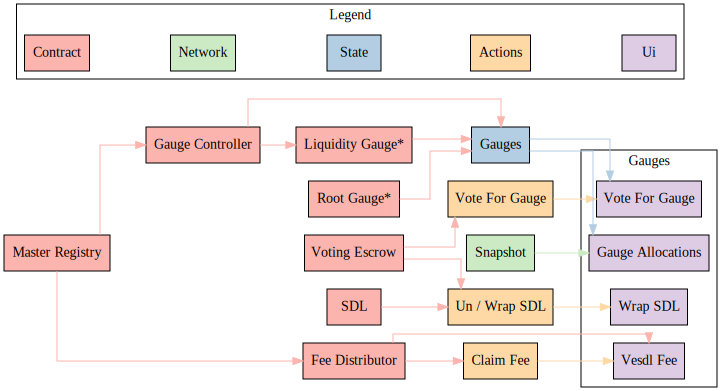

In [7]:
generate_tree(G, ui_page_gauges, save=SAVE_IMAGES)

# Gauge Farm Flow

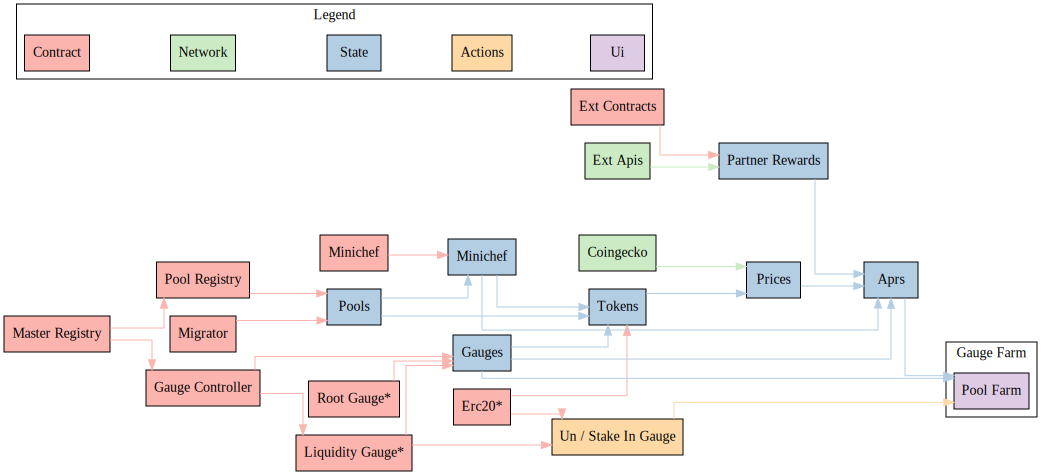

In [8]:
generate_tree(G, ui_page_gauge_farm, save=SAVE_IMAGES)

# Swap Flow

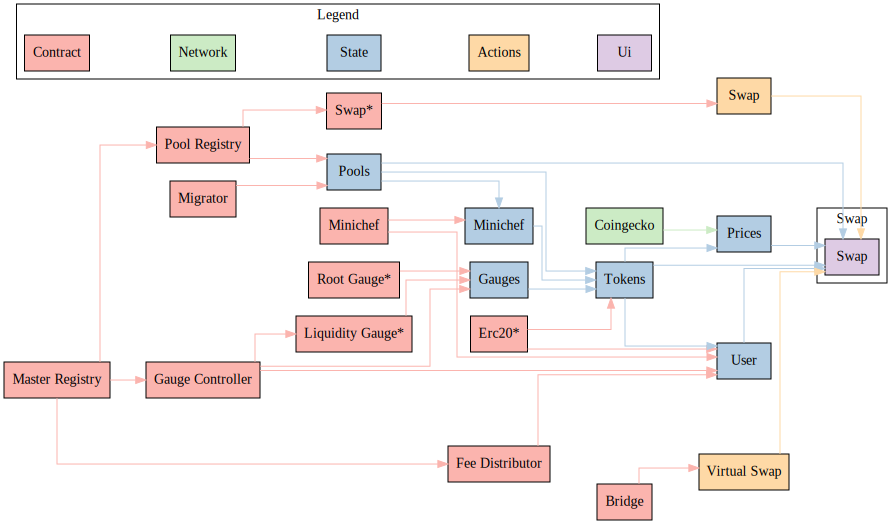

In [9]:
generate_tree(G, ui_page_swap, save=SAVE_IMAGES)

# Pools Flow

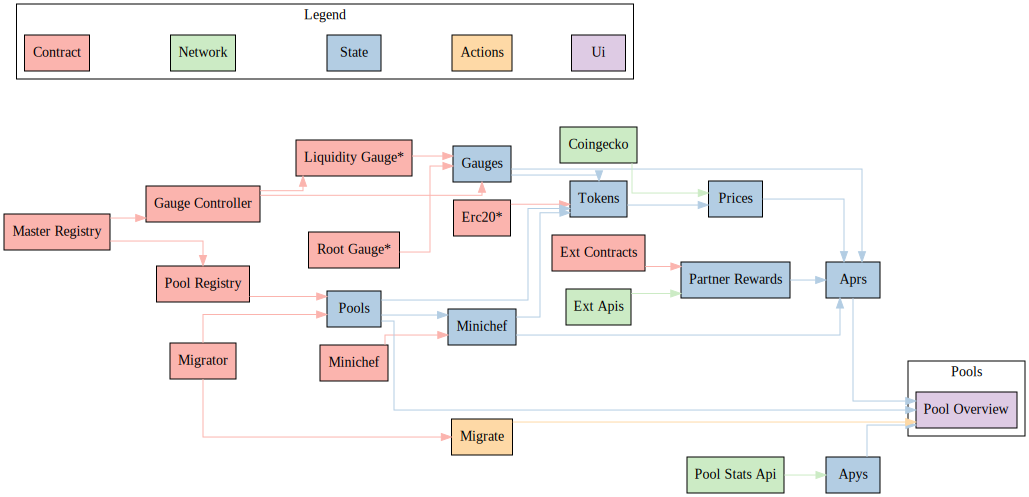

In [10]:
generate_tree(G, ui_page_pools, save=SAVE_IMAGES)


# Pool Flow

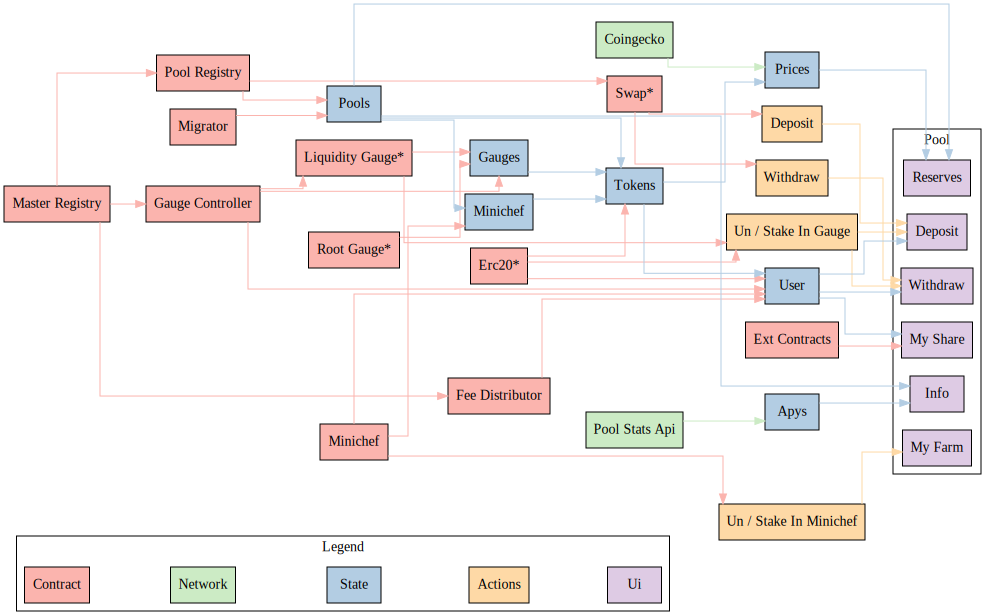

In [11]:
generate_tree(G, ui_page_pool, save=SAVE_IMAGES)

# Create Permissionless Pool Flow

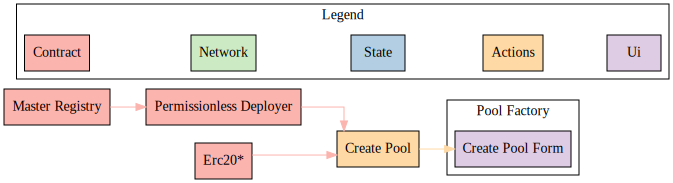

In [12]:
generate_tree(G, ui_page_pool_factory, save=SAVE_IMAGES)

# All

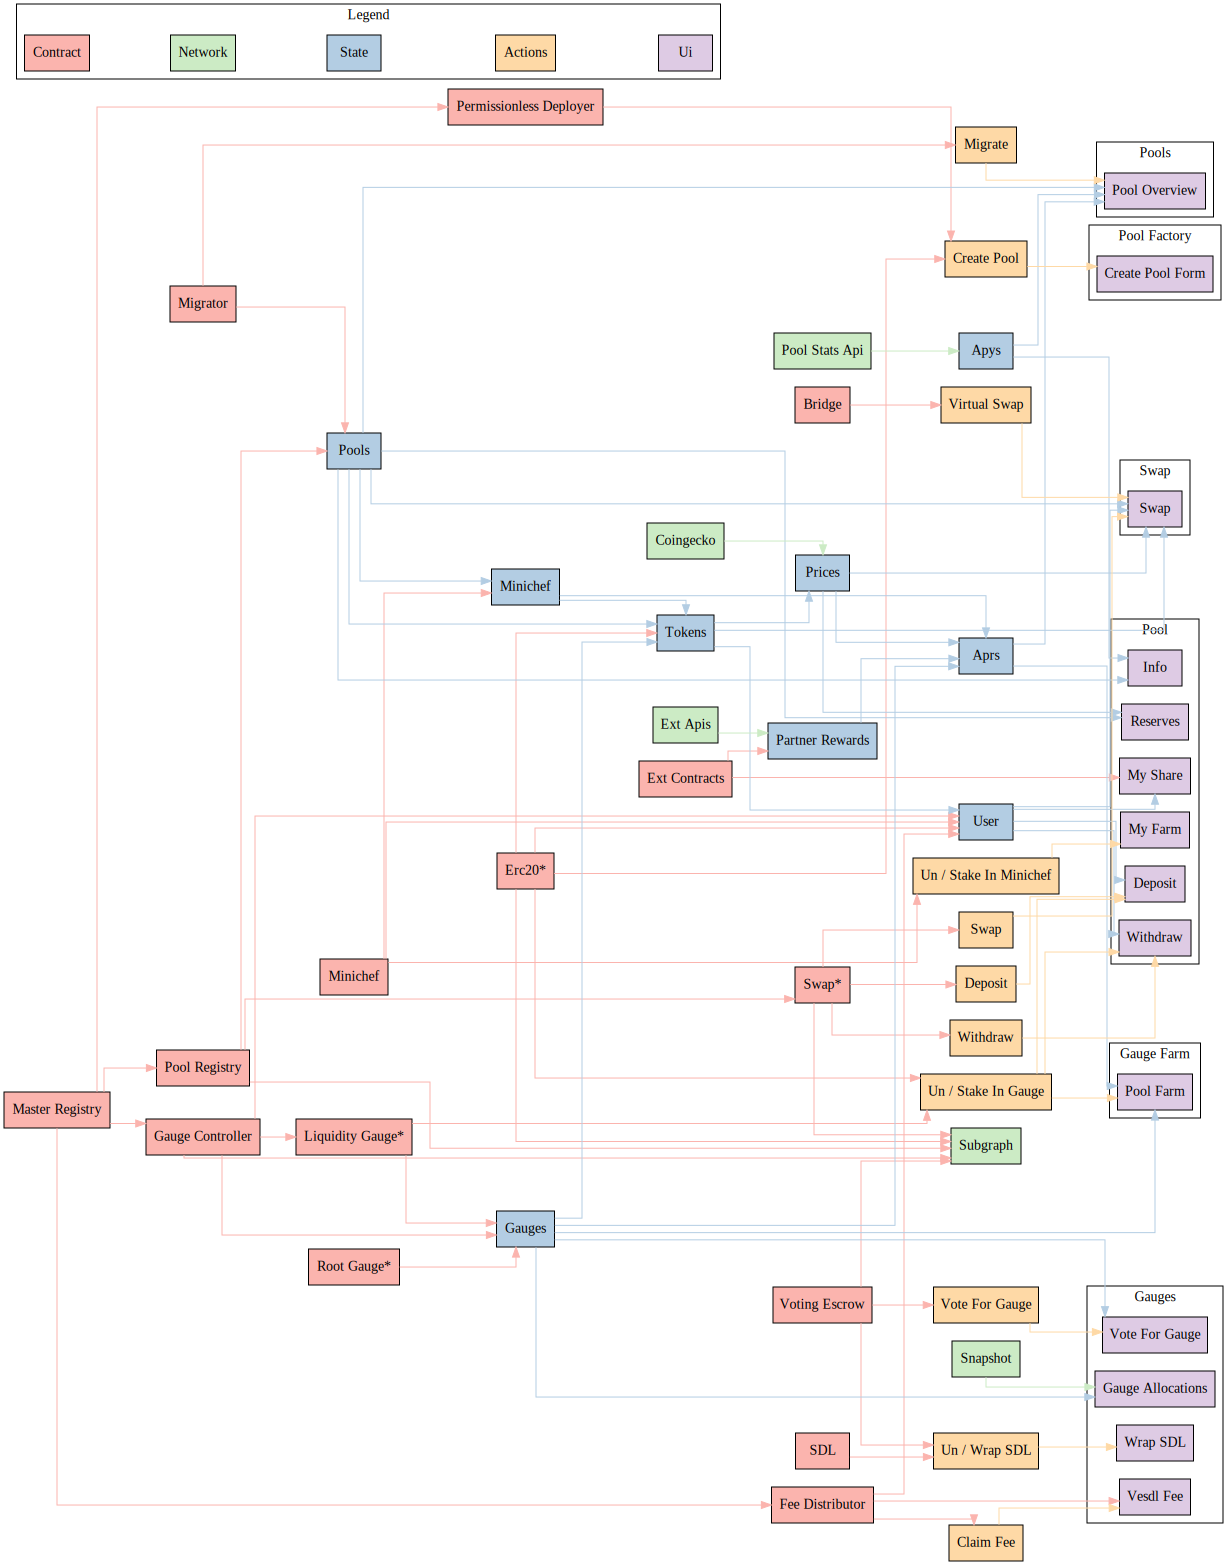

In [13]:
generate_tree(G, 'all', save=SAVE_IMAGES)